In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [4]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print (decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20


  512/15000 [>.............................] - ETA: 33s - loss: 0.6939 - acc: 0.5020

 1024/15000 [=>............................] - ETA: 17s - loss: 0.6918 - acc: 0.5322

 2048/15000 [===>..........................] - ETA: 8s - loss: 0.6750 - acc: 0.5972 

 3072/15000 [=====>........................] - ETA: 5s - loss: 0.6537 - acc: 0.6439

 4096/15000 [=======>......................] - ETA: 3s - loss: 0.6430 - acc: 0.6414

 5120/15000 [=========>....................] - ETA: 3s - loss: 0.6230 - acc: 0.6732

 6144/15000 [===========>..................] - ETA: 2s - loss: 0.6069 - acc: 0.6934

 7168/15000 [=============>................] - ETA: 1s - loss: 0.5920 - acc: 0.7100

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.5761 - acc: 0.7271

 9216/15000 [=================>............] - ETA: 1s - loss: 0.5654 - acc: 0.7382

10240/15000 [===================>..........] - ETA: 0s - loss: 0.5557 - acc: 0.7465

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5453 - acc: 0.7551

12288/15000 [=======================>......] - ETA: 0s - loss: 0.5348 - acc: 0.7633

13312/15000 [=========================>....] - ETA: 0s - loss: 0.5239 - acc: 0.7707

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5150 - acc: 0.7771

15000/15000 [==============================] - 3s 180us/step - loss: 0.5090 - acc: 0.7815 - val_loss: 0.3799 - val_acc: 0.8683


Epoch 2/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.3239 - acc: 0.9082

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.3324 - acc: 0.9121

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.3232 - acc: 0.9121

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3177 - acc: 0.9163

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3119 - acc: 0.9149

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3091 - acc: 0.9153

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3078 - acc: 0.9112

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3128 - acc: 0.9066

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3118 - acc: 0.9053

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3100 - acc: 0.9054

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3085 - acc: 0.9068

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3067 - acc: 0.9062

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3043 - acc: 0.9055

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3031 - acc: 0.9046

14848/15000 [============================>.] - ETA: 0s - loss: 0.3009 - acc: 0.9050

15000/15000 [==============================] - 1s 91us/step - loss: 0.3007 - acc: 0.9051 - val_loss: 0.3004 - val_acc: 0.8897


Epoch 3/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.2118 - acc: 0.9375

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.2228 - acc: 0.9329

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2193 - acc: 0.9367

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2251 - acc: 0.9302

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2218 - acc: 0.9332

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2234 - acc: 0.9320

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2211 - acc: 0.9319

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2230 - acc: 0.9302

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2234 - acc: 0.9277

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2222 - acc: 0.9285

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2207 - acc: 0.9284

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2204 - acc: 0.9282

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2202 - acc: 0.9277

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2184 - acc: 0.9283

14848/15000 [============================>.] - ETA: 0s - loss: 0.2182 - acc: 0.9287

15000/15000 [==============================] - 1s 91us/step - loss: 0.2181 - acc: 0.9285 - val_loss: 0.3084 - val_acc: 0.8719


Epoch 4/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1954 - acc: 0.9375

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1896 - acc: 0.9388

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1854 - acc: 0.9426

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1765 - acc: 0.9481

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1757 - acc: 0.9492

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1771 - acc: 0.9474

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1752 - acc: 0.9477

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1741 - acc: 0.9487

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1727 - acc: 0.9483

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1719 - acc: 0.9485

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1737 - acc: 0.9469

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1750 - acc: 0.9450

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1771 - acc: 0.9433

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1765 - acc: 0.9435

14848/15000 [============================>.] - ETA: 0s - loss: 0.1754 - acc: 0.9436

15000/15000 [==============================] - 1s 94us/step - loss: 0.1751 - acc: 0.9436 - val_loss: 0.2838 - val_acc: 0.8838


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1319 - acc: 0.9688

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1437 - acc: 0.9616

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1378 - acc: 0.9625

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1358 - acc: 0.9648

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1356 - acc: 0.9640

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1375 - acc: 0.9627

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1418 - acc: 0.9590

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1415 - acc: 0.9585

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1397 - acc: 0.9585

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1394 - acc: 0.9585

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1407 - acc: 0.9569

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1412 - acc: 0.9564

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1412 - acc: 0.9555

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1428 - acc: 0.9544

14848/15000 [============================>.] - ETA: 0s - loss: 0.1424 - acc: 0.9542

15000/15000 [==============================] - 1s 97us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2845 - val_acc: 0.8869


Epoch 6/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1231 - acc: 0.9668

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1154 - acc: 0.9688

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1052 - acc: 0.9723

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1068 - acc: 0.9713

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1125 - acc: 0.9701

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1155 - acc: 0.9677

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1154 - acc: 0.9675

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1164 - acc: 0.9664

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1162 - acc: 0.9654

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1155 - acc: 0.9653

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1153 - acc: 0.9652

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1146 - acc: 0.9651

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1149 - acc: 0.9651

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1154 - acc: 0.9648

14848/15000 [============================>.] - ETA: 0s - loss: 0.1149 - acc: 0.9652

15000/15000 [==============================] - 1s 92us/step - loss: 0.1150 - acc: 0.9653 - val_loss: 0.3153 - val_acc: 0.8777


Epoch 7/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1021 - acc: 0.9707

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1003 - acc: 0.9701

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0955 - acc: 0.9746

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0939 - acc: 0.9746

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0913 - acc: 0.9753

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0902 - acc: 0.9760

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0918 - acc: 0.9746

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0943 - acc: 0.9734

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0957 - acc: 0.9723

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0972 - acc: 0.9718

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0974 - acc: 0.9715

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0973 - acc: 0.9711

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0972 - acc: 0.9711

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0979 - acc: 0.9707

14848/15000 [============================>.] - ETA: 0s - loss: 0.0980 - acc: 0.9708

15000/15000 [==============================] - 1s 94us/step - loss: 0.0979 - acc: 0.9709 - val_loss: 0.3129 - val_acc: 0.8844


Epoch 8/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0730 - acc: 0.9844

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0711 - acc: 0.9818

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0691 - acc: 0.9836

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0730 - acc: 0.9802

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0760 - acc: 0.9783

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0751 - acc: 0.9785

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0753 - acc: 0.9785

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0747 - acc: 0.9789

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0759 - acc: 0.9785

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0787 - acc: 0.9771

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0805 - acc: 0.9765

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0798 - acc: 0.9769

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0799 - acc: 0.9766

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0791 - acc: 0.9771

14848/15000 [============================>.] - ETA: 0s - loss: 0.0797 - acc: 0.9768

15000/15000 [==============================] - 1s 91us/step - loss: 0.0808 - acc: 0.9763 - val_loss: 0.3858 - val_acc: 0.8651


Epoch 9/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0831 - acc: 0.9746

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0653 - acc: 0.9831

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0593 - acc: 0.9871

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0588 - acc: 0.9877

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0595 - acc: 0.9876

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0627 - acc: 0.9858

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0614 - acc: 0.9860

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0615 - acc: 0.9857

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0622 - acc: 0.9851

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0638 - acc: 0.9841

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0670 - acc: 0.9822

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0672 - acc: 0.9823

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0670 - acc: 0.9823

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0663 - acc: 0.9822

14848/15000 [============================>.] - ETA: 0s - loss: 0.0659 - acc: 0.9822

15000/15000 [==============================] - 1s 92us/step - loss: 0.0662 - acc: 0.9819 - val_loss: 0.3637 - val_acc: 0.8781


Epoch 10/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0552 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0519 - acc: 0.9915

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0517 - acc: 0.9887

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0534 - acc: 0.9883

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0526 - acc: 0.9889

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0525 - acc: 0.9881

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0511 - acc: 0.9890

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0520 - acc: 0.9889

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0516 - acc: 0.9886

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0514 - acc: 0.9887

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0522 - acc: 0.9879

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0566 - acc: 0.9858

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0574 - acc: 0.9852

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0565 - acc: 0.9852

14848/15000 [============================>.] - ETA: 0s - loss: 0.0561 - acc: 0.9853

15000/15000 [==============================] - 1s 90us/step - loss: 0.0564 - acc: 0.9850 - val_loss: 0.3841 - val_acc: 0.8799


Epoch 11/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0405 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0321 - acc: 0.9961

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0363 - acc: 0.9941

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0353 - acc: 0.9947

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0340 - acc: 0.9946

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0355 - acc: 0.9940

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0353 - acc: 0.9941

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0358 - acc: 0.9940

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0372 - acc: 0.9933

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0405 - acc: 0.9915

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0414 - acc: 0.9911

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0417 - acc: 0.9907

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0423 - acc: 0.9904

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0425 - acc: 0.9905

14848/15000 [============================>.] - ETA: 0s - loss: 0.0435 - acc: 0.9899

15000/15000 [==============================] - 1s 94us/step - loss: 0.0434 - acc: 0.9899 - val_loss: 0.4147 - val_acc: 0.8787


Epoch 12/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0290 - acc: 0.9961

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0275 - acc: 0.9974

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0273 - acc: 0.9977

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0273 - acc: 0.9972

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0284 - acc: 0.9970

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0334 - acc: 0.9945

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0344 - acc: 0.9941

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0335 - acc: 0.9943

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0331 - acc: 0.9944

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0336 - acc: 0.9942

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0342 - acc: 0.9942

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0341 - acc: 0.9941

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0345 - acc: 0.9938

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0368 - acc: 0.9926

14848/15000 [============================>.] - ETA: 0s - loss: 0.0378 - acc: 0.9923

15000/15000 [==============================] - 1s 90us/step - loss: 0.0379 - acc: 0.9921 - val_loss: 0.4567 - val_acc: 0.8685


Epoch 13/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0261 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0254 - acc: 0.9980

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0281 - acc: 0.9957

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0261 - acc: 0.9964

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0249 - acc: 0.9970

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0240 - acc: 0.9970

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0244 - acc: 0.9965

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0258 - acc: 0.9956

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0255 - acc: 0.9957

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0258 - acc: 0.9955

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0267 - acc: 0.9952

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0285 - acc: 0.9941

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0301 - acc: 0.9930

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0303 - acc: 0.9929

14848/15000 [============================>.] - ETA: 0s - loss: 0.0301 - acc: 0.9930

15000/15000 [==============================] - 1s 91us/step - loss: 0.0300 - acc: 0.9931 - val_loss: 0.4719 - val_acc: 0.8734


Epoch 14/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0177 - acc: 0.9980

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0186 - acc: 0.9974

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0178 - acc: 0.9977

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0189 - acc: 0.9972

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0186 - acc: 0.9972

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0190 - acc: 0.9972

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0190 - acc: 0.9973

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0189 - acc: 0.9974

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0190 - acc: 0.9975

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0191 - acc: 0.9973

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0212 - acc: 0.9960

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0252 - acc: 0.9939

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0252 - acc: 0.9938

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0249 - acc: 0.9941

14848/15000 [============================>.] - ETA: 0s - loss: 0.0248 - acc: 0.9943

15000/15000 [==============================] - 2s 101us/step - loss: 0.0247 - acc: 0.9943 - val_loss: 0.5054 - val_acc: 0.8717


Epoch 15/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0101 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0141 - acc: 0.9987

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0138 - acc: 0.9984

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0144 - acc: 0.9989

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0142 - acc: 0.9989

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0144 - acc: 0.9991

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0144 - acc: 0.9989

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0149 - acc: 0.9987

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0152 - acc: 0.9989

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0157 - acc: 0.9988

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0159 - acc: 0.9986

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0186 - acc: 0.9971

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0201 - acc: 0.9963

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0197 - acc: 0.9964

14848/15000 [============================>.] - ETA: 0s - loss: 0.0194 - acc: 0.9965

15000/15000 [==============================] - 1s 91us/step - loss: 0.0193 - acc: 0.9965 - val_loss: 0.5324 - val_acc: 0.8706


Epoch 16/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0194 - acc: 0.9941

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0143 - acc: 0.9974

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0130 - acc: 0.9984

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0123 - acc: 0.9989

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0121 - acc: 0.9989

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0118 - acc: 0.9989

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0117 - acc: 0.9991

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0118 - acc: 0.9990

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0120 - acc: 0.9989

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0124 - acc: 0.9989

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0159 - acc: 0.9972

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0178 - acc: 0.9960

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0173 - acc: 0.9962

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0169 - acc: 0.9964

14848/15000 [============================>.] - ETA: 0s - loss: 0.0166 - acc: 0.9966

15000/15000 [==============================] - 1s 91us/step - loss: 0.0165 - acc: 0.9966 - val_loss: 0.5651 - val_acc: 0.8691


Epoch 17/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0102 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0083 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0086 - acc: 0.9996

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0084 - acc: 0.9997

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0086 - acc: 0.9996

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0088 - acc: 0.9996

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0085 - acc: 0.9997

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0085 - acc: 0.9997

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0088 - acc: 0.9995

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0090 - acc: 0.9995

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0099 - acc: 0.9992

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0121 - acc: 0.9985

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0127 - acc: 0.9981

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0124 - acc: 0.9982

14848/15000 [============================>.] - ETA: 0s - loss: 0.0123 - acc: 0.9982

15000/15000 [==============================] - 1s 91us/step - loss: 0.0123 - acc: 0.9983 - val_loss: 0.5978 - val_acc: 0.8671


Epoch 18/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0082 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0069 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0066 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0068 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0068 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0068 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0067 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0066 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0065 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0066 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0090 - acc: 0.9989

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0120 - acc: 0.9972

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0119 - acc: 0.9973

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0116 - acc: 0.9975

14848/15000 [============================>.] - ETA: 0s - loss: 0.0114 - acc: 0.9976

15000/15000 [==============================] - 1s 93us/step - loss: 0.0113 - acc: 0.9977 - val_loss: 0.6286 - val_acc: 0.8676


Epoch 19/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0060 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0053 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0054 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0051 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0057 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0054 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0054 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0053 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.9998

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.9998

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.9998

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.9998

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0057 - acc: 0.9998

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0057 - acc: 0.9999

14848/15000 [============================>.] - ETA: 0s - loss: 0.0063 - acc: 0.9997

15000/15000 [==============================] - 1s 92us/step - loss: 0.0069 - acc: 0.9995 - val_loss: 0.7489 - val_acc: 0.8519


Epoch 20/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0171 - acc: 0.9980

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0084 - acc: 0.9993

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0071 - acc: 0.9996

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0065 - acc: 0.9997

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0060 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0055 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0053 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0051 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.9998

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.9997

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.9997

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.9997

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.9997

14848/15000 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.9997

15000/15000 [==============================] - 1s 94us/step - loss: 0.0050 - acc: 0.9997 - val_loss: 0.6870 - val_acc: 0.8662


In [16]:
history_dict = history.history
print (history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


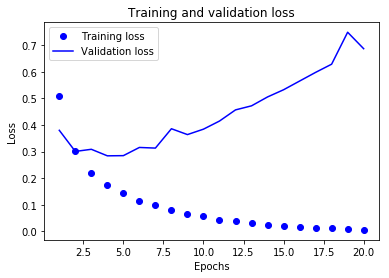

In [20]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

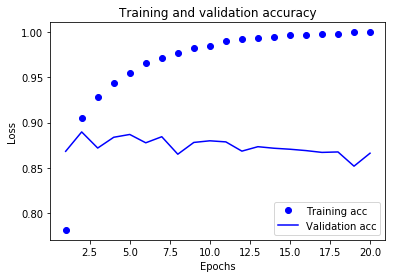

In [21]:
plt.clf()
acc_values = history_dict['acc']
val_acc_value = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_value, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print (results)

Epoch 1/4
  512/25000 [..............................] - ETA: 2s - loss: 0.2051 - acc: 0.9570

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2693 - acc: 0.9486

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3136 - acc: 0.9445

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3087 - acc: 0.9442

 4096/25000 [===>..........................] - ETA: 1s - loss: 0.3016 - acc: 0.9431

 5120/25000 [=====>........................] - ETA: 1s - loss: 0.2847 - acc: 0.9457

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2780 - acc: 0.9466

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2856 - acc: 0.9446

 7168/25000 [=======>......................] - ETA: 1s - loss: 0.2795 - acc: 0.9452

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2768 - acc: 0.9451

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2767 - acc: 0.9444

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2715 - acc: 0.9449

10240/25000 [===========>..................] - ETA: 1s - loss: 0.2680 - acc: 0.9451

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2620 - acc: 0.9455

11264/25000 [============>.................] - ETA: 1s - loss: 0.2589 - acc: 0.9458

11776/25000 [=============>................] - ETA: 1s - loss: 0.2572 - acc: 0.9458

12800/25000 [==============>...............] - ETA: 1s - loss: 0.2565 - acc: 0.9459

13824/25000 [===============>..............] - ETA: 1s - loss: 0.2520 - acc: 0.9454

14848/25000 [================>.............] - ETA: 1s - loss: 0.2490 - acc: 0.9448

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2424 - acc: 0.9449

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2389 - acc: 0.9450

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2361 - acc: 0.9453

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2350 - acc: 0.9446

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2322 - acc: 0.9448

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2308 - acc: 0.9445

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2290 - acc: 0.9444

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2261 - acc: 0.9445

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2239 - acc: 0.9451

25000/25000 [==============================] - 2s 91us/step - loss: 0.2212 - acc: 0.9456


Epoch 2/4
  512/25000 [..............................] - ETA: 2s - loss: 0.1274 - acc: 0.9609

 1536/25000 [>.............................] - ETA: 2s - loss: 0.1305 - acc: 0.9570

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1260 - acc: 0.9605

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1316 - acc: 0.9604

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1357 - acc: 0.9599

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1358 - acc: 0.9611

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1356 - acc: 0.9615

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1362 - acc: 0.9608

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1343 - acc: 0.9605

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1344 - acc: 0.9604

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1339 - acc: 0.9598

11776/25000 [=============>................] - ETA: 1s - loss: 0.1322 - acc: 0.9608

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1336 - acc: 0.9609

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1364 - acc: 0.9604

14848/25000 [================>.............] - ETA: 0s - loss: 0.1369 - acc: 0.9601

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1366 - acc: 0.9593

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1357 - acc: 0.9596

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1358 - acc: 0.9594

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1385 - acc: 0.9586

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1396 - acc: 0.9582

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1379 - acc: 0.9587

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1379 - acc: 0.9586

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1388 - acc: 0.9581

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1405 - acc: 0.9577

25000/25000 [==============================] - 2s 72us/step - loss: 0.1411 - acc: 0.9577


Epoch 3/4


  512/25000 [..............................] - ETA: 2s - loss: 0.0672 - acc: 0.9863

 1536/25000 [>.............................] - ETA: 1s - loss: 0.0987 - acc: 0.9733

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1131 - acc: 0.9660

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1156 - acc: 0.9646

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1112 - acc: 0.9672

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1068 - acc: 0.9682

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1056 - acc: 0.9691

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1079 - acc: 0.9685

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1108 - acc: 0.9686

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1096 - acc: 0.9689

10752/25000 [===========>..................] - ETA: 0s - loss: 0.1078 - acc: 0.9690

11776/25000 [=============>................] - ETA: 0s - loss: 0.1070 - acc: 0.9688

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1059 - acc: 0.9688

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1056 - acc: 0.9690

14848/25000 [================>.............] - ETA: 0s - loss: 0.1055 - acc: 0.9685

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1056 - acc: 0.9681

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1051 - acc: 0.9682

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1071 - acc: 0.9680

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1064 - acc: 0.9679

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1073 - acc: 0.9678

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1074 - acc: 0.9677

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1077 - acc: 0.9677

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1088 - acc: 0.9674

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1098 - acc: 0.9669

25000/25000 [==============================] - 2s 68us/step - loss: 0.1103 - acc: 0.9670


Epoch 4/4


  512/25000 [..............................] - ETA: 2s - loss: 0.0909 - acc: 0.9727

 1536/25000 [>.............................] - ETA: 1s - loss: 0.0921 - acc: 0.9772

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0828 - acc: 0.9793

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0802 - acc: 0.9782

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0817 - acc: 0.9783

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0819 - acc: 0.9775

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0849 - acc: 0.9761

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0842 - acc: 0.9757

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0819 - acc: 0.9762

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0788 - acc: 0.9770

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0796 - acc: 0.9767

11776/25000 [=============>................] - ETA: 0s - loss: 0.0821 - acc: 0.9757

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0816 - acc: 0.9756

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0810 - acc: 0.9750

14848/25000 [================>.............] - ETA: 0s - loss: 0.0809 - acc: 0.9749

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0808 - acc: 0.9749

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0807 - acc: 0.9749

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0828 - acc: 0.9746

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0850 - acc: 0.9739

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0872 - acc: 0.9732

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0870 - acc: 0.9734

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0881 - acc: 0.9729

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0879 - acc: 0.9728

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0871 - acc: 0.9730

25000/25000 [==============================] - 2s 69us/step - loss: 0.0876 - acc: 0.9726


   32/25000 [..............................] - ETA: 2s

  672/25000 [..............................] - ETA: 1s

 1376/25000 [>.............................] - ETA: 1s

 2080/25000 [=>............................] - ETA: 1s

 2784/25000 [==>...........................] - ETA: 1s

 3456/25000 [===>..........................] - ETA: 1s

 4128/25000 [===>..........................] - ETA: 1s

 4800/25000 [====>.........................] - ETA: 1s

 5504/25000 [=====>........................] - ETA: 1s

 6240/25000 [======>.......................] - ETA: 1s

 6880/25000 [=======>......................] - ETA: 1s

 7584/25000 [========>.....................] - ETA: 1s

 8288/25000 [========>.....................] - ETA: 1s

 8992/25000 [=========>....................] - ETA: 1s

 9696/25000 [==========>...................] - ETA: 1s

10400/25000 [===========>..................] - ETA: 1s

11104/25000 [============>.................] - ETA: 1s

11776/25000 [=============>................] - ETA: 0s

12384/25000 [=============>................] - ETA: 0s

13056/25000 [==============>...............] - ETA: 0s

13728/25000 [===============>..............] - ETA: 0s

14400/25000 [================>.............] - ETA: 0s

15040/25000 [=================>............] - ETA: 0s

15744/25000 [=================>............] - ETA: 0s

16384/25000 [==================>...........] - ETA: 0s

17088/25000 [===================>..........] - ETA: 0s

17728/25000 [====================>.........] - ETA: 0s

18432/25000 [=====================>........] - ETA: 0s

19136/25000 [=====================>........] - ETA: 0s

19872/25000 [======================>.......] - ETA: 0s

20576/25000 [=======================>......] - ETA: 0s

21216/25000 [========================>.....] - ETA: 0s

21920/25000 [=========================>....] - ETA: 0s

22592/25000 [==========================>...] - ETA: 0s

23232/25000 [==========================>...] - ETA: 0s

23936/25000 [===========================>..] - ETA: 0s

24608/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 2s 75us/step


[0.5023287539744377, 0.85832]


In [23]:
model.predict(x_test)

array([[0.01250554],
       [0.9999989 ],
       [0.98541117],
       ...,
       [0.22338772],
       [0.13988984],
       [0.80245143]], dtype=float32)